In [132]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [133]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning & Data Science Avanzado/Proyecto aplicado/bank-additional-full.csv', sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Preprocesamiento

Variables Categoricas

In [134]:
from sklearn import preprocessing

In [135]:
df['age'].nunique()

78

Se ha asumido lo rangos de edad de mas de 18 y menos de 70 años (mayor detalle EDA)

In [136]:
df = df[(df['age'] >= 18) & (df['age'] < 70) ]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


Debido a al alto numero de valores unicos para la variable 'age', se decidio crear grupos de edades. Esto se logró extrayendo el primer numero que compone a la variable y se interpreta de la siguiente forma: 2 representa al grupo de personas entre los 20 años, 3 son las personas entre los 30 años y asi sucesivamente.

In [137]:
df['age'] = df['age'].apply(lambda x: str(x)[0])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,5,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,5,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,3,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,2,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,4,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,5,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


Se inspecciona el numero de valores unicos para todas las variables

In [138]:
for x in df.columns:
  print(f'Variable {x}:\n {df[x].nunique()} \n')
  print(df[x].unique())
  print(f'\n ---------------------------------')


Variable age:
 6 

['5' '3' '4' '2' '6' '1']

 ---------------------------------
Variable job:
 12 

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 ---------------------------------
Variable marital:
 4 

['married' 'single' 'divorced' 'unknown']

 ---------------------------------
Variable education:
 8 

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 ---------------------------------
Variable default:
 3 

['no' 'unknown' 'yes']

 ---------------------------------
Variable housing:
 3 

['no' 'yes' 'unknown']

 ---------------------------------
Variable loan:
 3 

['no' 'yes' 'unknown']

 ---------------------------------
Variable contact:
 2 

['telephone' 'cellular']

 ---------------------------------
Variable month:
 10 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

 -----------------------

# Variables Ordinales

Durante el experimento se ha asumido que las variables a continuación presentan un orden o una jerarquía inherente entre las categorías

In [139]:
df['poutcome'] = df['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
df['default'] = df['default'].map({'yes': -1,'unknown': 0,'no': 1})
df['housing'] = df['housing'].map({'yes': -1,'unknown': 0,'no': 1})
df['loan'] = df['loan'].map({'yes': -1,'unknown': 0,'no': 1})
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,5,housemaid,married,basic.4y,1,1,1,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,5,services,married,high.school,0,1,1,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,3,services,married,high.school,1,-1,1,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,4,admin.,married,basic.6y,1,1,1,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,5,services,married,high.school,1,1,-1,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,3,admin.,married,university.degree,1,-1,1,cellular,nov,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,2,unemployed,single,basic.4y,1,-1,1,cellular,nov,fri,...,1,9,1,1,-1.1,94.767,-50.8,1.028,4963.6,no
41184,4,blue-collar,married,professional.course,1,1,1,cellular,nov,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,5,retired,married,university.degree,1,-1,1,cellular,nov,fri,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no


# Variables Nominales

In [140]:
le = preprocessing.LabelEncoder()

df['job'] = le.fit_transform(df['job'])

df['marital'] = le.fit_transform(df['marital'])

df['education'] = le.fit_transform(df['education'])

df['default'] = le.fit_transform(df['default'])

df['housing'] = le.fit_transform(df['housing'])

df['loan'] = le.fit_transform(df['loan'])

df['contact'] = le.fit_transform(df['contact'])

df['month'] = le.fit_transform(df['month'])

df['day_of_week'] = le.fit_transform(df['day_of_week'])


df



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,5,3,1,0,2,2,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,5,7,1,3,1,2,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,3,7,1,3,2,0,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,4,0,1,1,2,2,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,5,7,1,3,2,2,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,3,0,1,6,2,0,2,0,7,0,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,2,10,2,0,2,0,2,0,7,0,...,1,9,1,1,-1.1,94.767,-50.8,1.028,4963.6,no
41184,4,1,1,5,2,2,2,0,7,0,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,5,5,1,6,2,0,2,0,7,0,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no


Para el caso de la variable 'duration', se realizará nuevamente la creación de grupos. Para esta ocación se asume que los valores estan representados en segundos y se contruiran 10 diferentes grupos que represetan la cantidad de minutos. 1 es un minuto, 2 son dos minutos, etc.

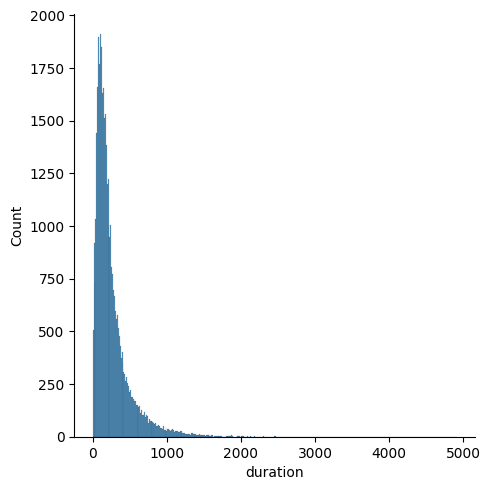

In [141]:
fig.set_size_inches(40, 8)
sns.displot(data = df, x = 'duration')
ax.set_xlabel('duration', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [142]:
def duration(x):
  if x <= 60:
    x = 1
  elif x > 60 and x <= 120:
    x = 2
  elif x > 120 and x <= 180:
    x = 3
  elif x > 180 and x <= 240:
    x = 4
  elif x > 240 and x <= 300:
    x = 5
  elif x > 300 and x <= 360:
    x = 6
  elif x > 360 and x <= 420:
    x = 7
  elif x > 420 and x <= 480:
    x = 8
  elif x > 480 and x <= 540:
    x = 9
  else:
    x = 10

  return x

In [143]:
df['duration'] = df['duration'].apply(duration)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,5,3,1,0,2,2,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,5,7,1,3,1,2,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,3,7,1,3,2,0,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,4,0,1,1,2,2,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,5,7,1,3,2,2,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,3,0,1,6,2,0,2,0,7,0,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,2,10,2,0,2,0,2,0,7,0,...,1,9,1,1,-1.1,94.767,-50.8,1.028,4963.6,no
41184,4,1,1,5,2,2,2,0,7,0,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no
41185,5,5,1,6,2,0,2,0,7,0,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,no


Finalmente, se codifica la variable objetivo. no = 0, yes = 1.

In [144]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [145]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,5,3,1,0,2,2,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,5,7,1,3,1,2,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,3,7,1,3,2,0,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,4,0,1,1,2,2,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,5,7,1,3,2,2,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,3,0,1,6,2,0,2,0,7,0,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41182,2,10,2,0,2,0,2,0,7,0,...,1,9,1,1,-1.1,94.767,-50.8,1.028,4963.6,0
41184,4,1,1,5,2,2,2,0,7,0,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,5,5,1,6,2,0,2,0,7,0,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
